# Job salary prediction

<image src="https://storage.googleapis.com/kaggle-media/competitions/kaggle/3342/media/salary%20prediction%20engine%20v2.png"/>

The [dataset](https://www.kaggle.com/c/job-salary-prediction/data) consists of a large number of rows representing individual job ads, and a series of fields about each job ad.

These fields are as follows:

* `Id` - A unique identifier for each job ad

* `Title` - A freetext field supplied to us by the job advertiser as the Title of the job ad.  Normally this is a summary of the job title or role.

* `FullDescription` - The full text of the job ad as provided by the job advertiser.  Where you see ***s, we have stripped values from the description in order to ensure that no salary information appears within the descriptions.  There may be some collateral damage here where we have also removed other numerics.

* `LocationRaw` - The freetext location as provided by the job advertiser.

* `LocationNormalized` - Adzuna's normalised location from within our own location tree, interpreted by us based on the raw location.  Our normaliser is not perfect!

* `ContractType` - full_time or part_time, interpreted by Adzuna from description or a specific additional field we received from the advertiser.

* `ContractTime` - permanent or contract, interpreted by Adzuna from description or a specific additional field we received from the advertiser.

* `Company` - the name of the employer as supplied to us by the job advertiser.

* `Category` - which of 30 standard job categories this ad fits into, inferred in a very messy way based on the source the ad came from.  We know there is a lot of noise and error in this field.

* `SalaryRaw` - the freetext salary field we received in the job advert from the advertiser.

* `SalaryNormalised` - the annualised salary interpreted by Adzuna from the raw salary.  Note that this is always a single value based on the midpoint of any range found in the raw salary.  This is the value we are trying to predict.

* `SourceName` - the name of the website or advertiser from whom we received the job advert.

All of the data is real, live data used in job ads so is clearly subject to lots of real world noise, including but not limited to: ads that are not UK based, salaries that are incorrectly stated, fields that are incorrectly normalised and duplicate adverts.



In [ ]:
%%capture
!wget https://github.com/eishkina-estia/ML2023/raw/main/data/job-salary-prediction.7z
!7z e job-salary-prediction.7z

In [ ]:
import pandas as pd
df = pd.read_csv('Train_rev1.csv')
print(df.shape)
df.head()

(244768, 12)


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


# Assignment

* Display the distribution of the target variable (`SalaryNormalized`).

* Calculate the average salary for each job category (`Category`)and sort results in descending order. Which category correspond to the highest average salary?

* Apply log transformation to the target and display the distribution of the new variable. Use the new variable as the target.

* Explore job description (`FullDescription`), then do preprocessing and vectorization using `TF-IDF` method.

* Split data keeping 20% for test. Do not forget to fix random state.

* Use `Ridge` regression using only the features exstracted from job descriptions. Evaluate the model with $R^2$ metric on train and test data.

* Check your model using the following tests:
  * `'Director'`
  * `'Manager'`
  * `'Data Scientist'`
  * `'Data Engineer'`
  * `'Machine Learning Engineer'`

* Display top 10 features with highest positive weights and top 10 features with highest negative weights.

* Try different values of hyperparameters :
    * `Ridge`/`Lasso` algorithms: regularization parameter
    * `TfIdfVectorizer`/`CountVectorizer` and some of their parameters.

* Try to combine text features with other features from the source dataset.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
RANDOM_STATE = 42

In [ ]:
# Keep only n rows - to reduce execution time
n = 100000
df = df.sample(n=n, random_state=RANDOM_STATE)

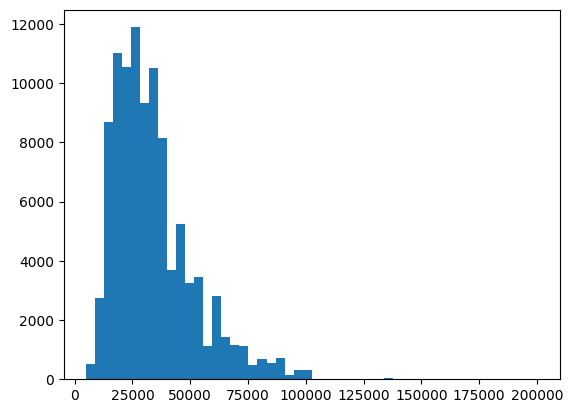

In [ ]:
# Display the distribution of the target variable (`SalaryNormalized`).
plt.hist(df['SalaryNormalized'], bins=50)
plt.show()

In [ ]:
# Calculate the average salary for each job category (`Category`)and sort results in descending order. Which category correspond to the highest average salary?
df.groupby('Category')['SalaryNormalized'].mean().sort_values(ascending=False)

Category
Energy, Oil & Gas Jobs              45862.329412
IT Jobs                             43803.154213
Legal Jobs                          43244.510104
Accounting & Finance Jobs           38455.092248
Consultancy Jobs                    37401.137079
Trade & Construction Jobs           36094.532156
Engineering Jobs                    35908.098920
PR, Advertising & Marketing Jobs    35226.096399
Other/General Jobs                  35172.568461
Scientific & QA Jobs                34658.807953
Creative & Design Jobs              33673.859568
Retail Jobs                         33089.852555
Healthcare & Nursing Jobs           32812.457489
HR & Recruitment Jobs               32720.676500
Property Jobs                       32019.654501
Social work Jobs                    31953.059192
Sales Jobs                          30673.829316
Graduate Jobs                       29116.929134
Charity & Voluntary Jobs            28251.843683
Teaching Jobs                       27717.881894
Logistics &

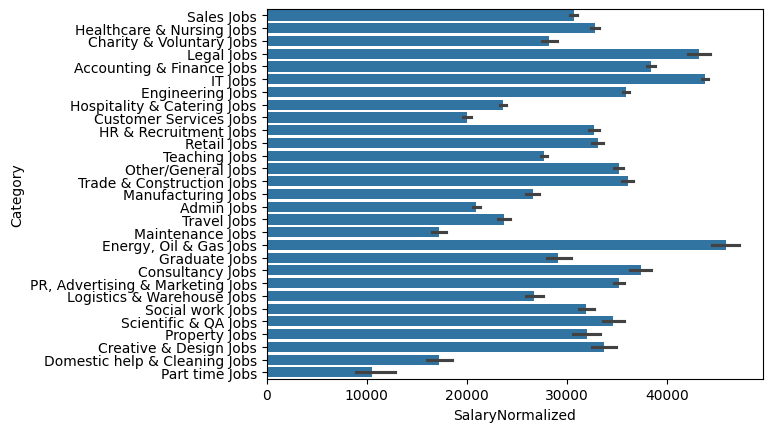

In [ ]:
sns.barplot(y=df['Category'], x=df['SalaryNormalized']);

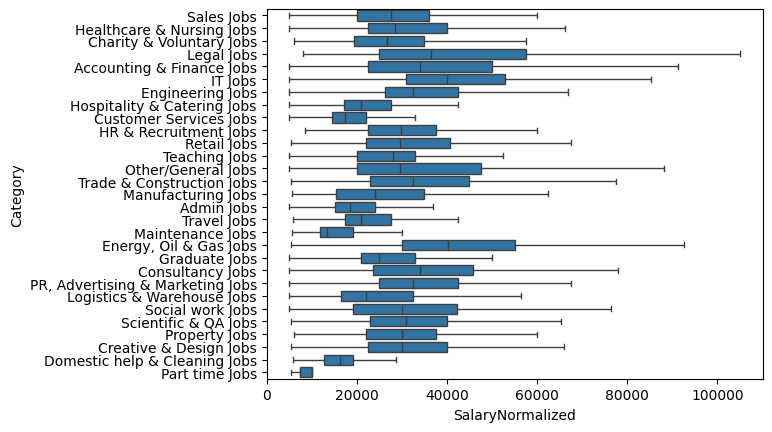

In [ ]:
sns.boxplot(y=df['Category'], x=df['SalaryNormalized'], showfliers=False);

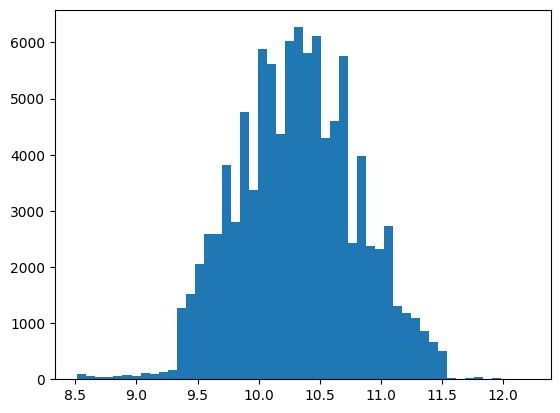

In [ ]:
# Apply log transformation to the target and display the distribution of the new variable. Use the new variable as the target.
df['SalaryNormalized_log'] = np.log(df['SalaryNormalized'])
plt.hist(df['SalaryNormalized_log'], bins=50)
plt.show()

In [ ]:
# Explore job description (`FullDescription`), then do preprocessing and vectorization using `TF-IDF` method.

pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

df[['FullDescription']].head(10)

,FullDescription
30390,"Business Account Manager Plumbing Heating Products Basic Salary ******** South West THE COMPANY : We are currently recruiting due to internal promotion for a very wellknown construction group, with a history stretching back to the ****'s and a turnover in excess of 300 million. You will be selling plumbing and heating products into plumbing and heating contractors, dealing with every sector from SMEs to 1man bands and right up to larger contractors. This role is an even split between account management and new business development and you will inherit some excellent accounts. Sales career opportunities within the group are excellent. THE PERSON : You will have the following skills; Field sales track record You will have sold a construction or industrial product They seek someone with..."
108709,"Job Title; Staff Nurse RGN/RMN – NightsLocation; Newton AbbeySalary; **** per hourHours; Part time – 22 hours per weekSkills; NMC Registration, Nursing Home, RGN, RMN, Staff Nurse, Registered General Nurse, Registered Mental Health Nurse, Mental Health, Old AgeJob Reference; ****RGNRegional Recruitment Services are currently recruiting for a Staff Nurse RGN/RMN to work within a medium sized Nursing Home based in the Newton Abbey area. The Role To provide a high standard of nursing care to clients suffering with Old Age, Mental Health and Physical DisabilitiesTo ensure compliance with CQC standards and guidelinesTo write and implement set care plansTo administer prescribed medicationTo conduct accurate risk assessments To ensure that information is recorded correctly To ensure the smoot..."
13924,"This dynamic international development charity is recruiting for a Community Fundraising Manager to play a key part in the delivery of the charity's fundraising strategy. You will take the lead on developing a community fundraising programme, including expanding an appeal programme and the charity's volunteer network. Key day to day duties within this position will include: To work closely with the Direct Marketing Manager to deliver a fundraising appeal for schools and churches, including undertaking an evaluation of previous appeals and developing a plan to increase income from this and other community DM activity To take the lead in developing High Value support from schools, churches and other community groups To develop and grow friends network including building effective rela..."
154606,Large regional law firm require a residential conveyancing Executive to join their very well respected team. You will have experience in all aspects of Conveyancing and be looking to join a firm that can offer you a structured career path. Excellent salary and benefits on offer.
172891,"This individual will work closely with the business in interpreting client investment guidelines, resolving compliance issues, researching client guideline and security issues, and analyzing both pre and posttrade compliance results. He/she will support Portfolio Managers across a broad range of products and will support the Manager of Investment Compliance in London with the implementation of guideline information for new accounts, revisions, and updates to existing accounts in a timely manner. The ideal candidate will also be involved in various investment compliance initiatives and in assisting with requests for additional compliance analysis or oversight. This individual will need to display sound business judgment in driving results and in implementing creative business solut Have..."
164389,SAP Project Manager My client is a management consulting partner rapidly expanding over the last two years. Since December ****010 that have hired around **** people in the UK and are now looking for another 2 SAP project Managers to be based in the London office. They are looking for candidates with a strong permanent background and ideally also a consulting background or large end customer experience. Candidates will need a passion for Project Management

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SalaryNormalized', 'SalaryNormalized_log'])
y = df['SalaryNormalized_log']

# Split data keeping 20% for test. Do not forget to fix random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((80000, 11), (20000, 11))

In [ ]:
X_train_nondesc = X_train.drop(columns='FullDescription')
X_test_nondesc = X_test.drop(columns='FullDescription')

X_train_desc = X_train['FullDescription']
X_test_desc = X_test['FullDescription']

In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# do preprocessing and vectorization using TF-IDF method.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=None, ngram_range=(1, 1))
X_train_desc_vec = tfidf_vectorizer.fit_transform(X_train_desc)
X_test_desc_vec = tfidf_vectorizer.transform(X_test_desc)

X_train_desc_vec.shape, X_test_desc_vec.shape

CPU times: user 24.4 s, sys: 417 ms, total: 24.8 s
Wall time: 25.2 s


((80000, 107342), (20000, 107342))

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

scaler = MaxAbsScaler()
X_train_desc_vec_scaled = scaler.fit_transform(X_train_desc_vec)
X_test_desc_vec_scaled = scaler.transform(X_test_desc_vec)

# Use `Ridge` regression using only the features exstracted from job descriptions.
model = Ridge()
model.fit(X_train_desc_vec_scaled, y_train)

# Evaluate the model with $R^2$ metric on train and test data.

y_pred_train = model.predict(X_train_desc_vec_scaled)
print(f'rmse on train set: {mean_squared_error(y_train, y_pred_train, squared=False):.3}')
print(f'r2 on train set:   {r2_score(y_train, y_pred_train):.3}')

y_pred_test = model.predict(X_test_desc_vec_scaled)
print(f'rmse on test set: {mean_squared_error(y_test, y_pred_test, squared=False):.3}')
print(f'r2 for test set: {r2_score(y_test, y_pred_test):.3}')

rmse on train set: 0.145
r2 on train set:   0.913
rmse on test set: 0.289
r2 for test set: 0.654


In [ ]:
# * Check your model using the following tests:
#   * `'Director'`
#   * `'Manager'`
#   * `'Data Scientist'`
#   * `'Data Engineer'`
#   * `'Machine Learning Engineer'`

def postprocess_target(y):
    return np.exp(y)

X_test_sample = ['Director', 'Manager', 'Data Scientist', 'Data Engineer', 'Machine Learning Engineer']

X_test_sample_preprocessed = tfidf_vectorizer.transform(X_test_sample)
X_test_sample_preprocessed = scaler.transform(X_test_sample_preprocessed)

y_pred_sample = model.predict(X_test_sample_preprocessed)
y_pred_sample = postprocess_target(y_pred_sample)

df_sample_pred = pd.DataFrame({
    'X': X_test_sample,
    'y_pred': y_pred_sample
}).sort_values('y_pred', ascending=False)

df_sample_pred

,X,y_pred
0,Director,88657.842986
1,Manager,60493.960457
3,Data Engineer,32167.482511
4,Machine Learning Engineer,25618.851480
2,Data Scientist,25130.819246


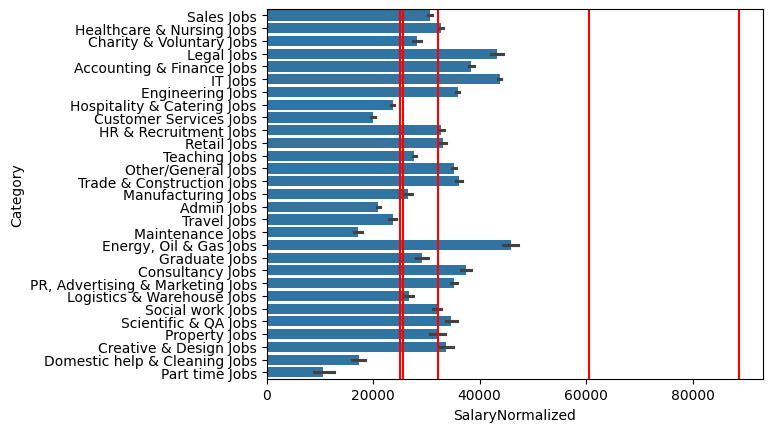

In [ ]:
sns.barplot(y=df['Category'], x=df['SalaryNormalized'])
for i in range(len(df_sample_pred)):
    plt.axvline(x=df_sample_pred['y_pred'][i], color='r')
plt.show()

In [ ]:
# Display top 10 features with highest positive weights and top 10 features with highest negative weights.
coefs = sorted(zip(list(np.array(tfidf_vectorizer.get_feature_names_out())[model.coef_ != 0]), model.coef_[model.coef_ != 0]), key=lambda x: -x[1])
word_coefs = pd.DataFrame(coefs, columns=["word", "weight"])
display(word_coefs.head(10))
display(word_coefs.tail(10))

,word,weight
0,itapprenticetraineephotocopyengineer_job,1.057464
1,optometrist,0.764793
2,occupance,0.730290
3,panals,0.730290
4,director,0.720528
5,csfcareersukcsfinancial,0.691792
6,discos,0.683660
7,aarosettesliveincommischef_job,0.653662
8,commischefberkshire,0.653662
9,gmc,0.653260


,word,weight
107332,200million,-0.689964
107333,year2classteachersouthshields_job,-0.717202
107334,donnell,-0.769495
107335,yarm,-0.775773
107336,northumbria,-0.823690
107337,orgainistion,-0.843727
107338,seniorpolicyplanner_job,-0.844015
107339,subsaharan,-0.854606
107340,physio,-0.883383
107341,elance,-1.008213


In [ ]:
def print_test_report(model, X_test, sort=True):

    y_pred = model.predict(X_test)
    y_pred = postprocess_target(y_pred)

    if not isinstance(X_test, pd.DataFrame):
        df_pred = pd.DataFrame({'X': X_test})
    else:
        df_pred = X_test

    df_pred['y_pred'] = y_pred

    if sort:
        df_pred = df_pred.sort_values('y_pred', ascending=False)

    display(df_pred)
    return

X_test_sample = ['Director', 'Manager', 'Data Scientist', 'Data Engineer', 'Machine Learning Engineer']

In [ ]:
from sklearn.pipeline import Pipeline

# pipeline + max_features=1000
ridge_tfidf = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 1))),
    ("scaler", MaxAbsScaler()),
    ("regressor", Ridge())])

In [ ]:
ridge_tfidf

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=1000, stop_words='english')),
                ('scaler', MaxAbsScaler()), ('regressor', Ridge())])

In [ ]:
%%time
ridge_tfidf.fit(X_train_desc, y_train)
y_pred_train = ridge_tfidf.predict(X_train_desc)
y_pred_test = ridge_tfidf.predict(X_test_desc)

print(f'r2 on train set:   {r2_score(y_train, y_pred_train):.3}')
print(f'r2 for test set: {r2_score(y_test, y_pred_test):.3}')

r2 on train set:   0.589
r2 for test set: 0.589
CPU times: user 42 s, sys: 1.77 s, total: 43.8 s
Wall time: 44.1 s


In [ ]:
print_test_report(ridge_tfidf, X_test=X_test_sample)

,X,y_pred
0,Director,77392.893659
1,Manager,47778.321555
3,Data Engineer,36217.272192
2,Data Scientist,33001.739631
4,Machine Learning Engineer,25792.093588


In [ ]:
# + bigrams
ridge_tfidf_bigrams = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))),
    ("scaler", MaxAbsScaler()),
    ("regressor", Ridge())])

In [ ]:
%%time
ridge_tfidf_bigrams.fit(X_train_desc, y_train)
y_pred_train = ridge_tfidf_bigrams.predict(X_train_desc)
y_pred_test = ridge_tfidf_bigrams.predict(X_test_desc)

print(f'r2 on train set:   {r2_score(y_train, y_pred_train):.3}')
print(f'r2 for test set: {r2_score(y_test, y_pred_test):.3}')

r2 on train set:   0.583
r2 for test set: 0.584
CPU times: user 1min 29s, sys: 3.48 s, total: 1min 33s
Wall time: 1min 33s


In [ ]:
print_test_report(ridge_tfidf_bigrams, X_test=X_test_sample)

,X,y_pred
0,Director,76597.890300
1,Manager,45625.523650
3,Data Engineer,36341.969327
2,Data Scientist,33451.847863
4,Machine Learning Engineer,25899.870763


In [ ]:
# Try to combine text features with other features from the source dataset.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

text_feature = 'FullDescription'
text_transformer = Pipeline(
    steps=[
        ("vectorizer", TfidfVectorizer(stop_words='english', max_features=100, ngram_range=(1, 2))),
        ("scaler", MaxAbsScaler())
    ]
)

categorical_features = ['Category']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("txt", text_transformer, text_feature),
        ("cat", categorical_transformer, categorical_features),
    ]
)

ridge_description_category = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", Ridge())
    ]
)

# params = {
#     'preprocessor__txt__vectorizer__max_features': 1000,
#     'preprocessor__txt__vectorizer__ngram_range': (1, 2)
# }
# ridge_description_category.set_params(params)

In [ ]:
# test preprocessor
X_train_temp = X_train.iloc[:1000]
y_train_temp = y_train.iloc[:1000]

X_train_temp_preprocessed = preprocessor.fit_transform(X_train_temp)
X_train_temp_preprocessed.shape, X_train_temp_preprocessed.min(), X_train_temp_preprocessed.max()

((1000, 129), 0.0, 1.0)

In [ ]:
len(df['Category'].unique())

29

In [ ]:
ridge_description_category

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('txt',
                                                  Pipeline(steps=[('vectorizer',
                                                                   TfidfVectorizer(max_features=100,
                                                                                   ngram_range=(1,
                                                                                                2),
                                                                                   stop_words='english')),
                                                                  ('scaler',
                                                                   MaxAbsScaler())]),
                                                  'FullDescription'),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category'])])),
                ('regressor', Ridge())])

In [ ]:
%%time
ridge_description_category.fit(X_train, y_train)

y_pred_train = ridge_description_category.predict(X_train)
y_pred_test = ridge_description_category.predict(X_test)

print(f'r2 on train set:   {r2_score(y_train, y_pred_train):.3}')
print(f'r2 for test set: {r2_score(y_test, y_pred_test):.3}')

r2 on train set:   0.418
r2 for test set: 0.429
CPU times: user 1min 25s, sys: 2.02 s, total: 1min 27s
Wall time: 1min 27s


In [ ]:
X_test_sample_df = pd.DataFrame({
    "FullDescription": X_test_sample,
    "Category": 'IT Jobs'})
X_test_sample_df

print_test_report(ridge_description_category, X_test=X_test_sample_df)

,FullDescription,Category,y_pred
1,Manager,IT Jobs,39109.130335
3,Data Engineer,IT Jobs,38511.503087
2,Data Scientist,IT Jobs,35531.005453
4,Machine Learning Engineer,IT Jobs,35144.795918
0,Director,IT Jobs,28714.027093


In [ ]:
# * Try different values of hyperparameters :
#     * `Ridge`/`Lasso` algorithms: regularization parameter
#     * `TfIdfVectorizer`/`CountVectorizer` and some of their parameters.